## 개요 

참여중인 딥러닝 스터디 3주차 기록입니다.

## 2주차 과제 설명

* tf.random.set_seed(2024)
  * 서로 다른 모델을 비교하는 경우, 시작점이 다른 것 때문에 성능우위가 다르게 측정되는 경우 발생
    (같은 성능임에도 다르게 나오거나, 좋은 모델이 더 나쁜 모델로 오인되는 경우)
  * 이러한 경우를 방지하고자, set_seed로 같은 지점에서 시작하게 할 수 있음
  * 딥러닝은 복잡한 다차원의 함수이므로, 좋은 시작점에 따라 달라질 수 있음
    (좋은 Optimizer를 사용하고 좋은 데이터를 쓴다면 차이는 줄어들 수 있음)

* Matrix Multiplication
  * A(1,2), B(2,1)와 같은 Matrix에서, A의 열(,2)과 B의 행(2,)의 숫자가 같아야 가능

* Cost function에서 마이너스(-)를 붙이는 경우
  * 높을수록 안좋은 척도여야 할 때, 계산식이 높을수록 좋은 값인 경우 붙여서 변환

* Learning rate
  * GD에서 안정적으로 최적점에 가게하기 위해 학습률을 조정
  * 사람이 지정하는 hyper parameter, 경험에 의해 넣는 경우가 많다(정답은 없음)

* Confusion Matrix
  * Recall, Precision 으로 표현하는 것은 경영진 등에는 와닿지 않을 수 있으므로 시각화하여 보여주면 좋음

## 2주차 과제 Logistic regression 코드 작성한 것
```python
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Train data
X_train = np.array([[1., 1.],
                   [1., 2.],
                   [2., 1.],
                   [3., 2.],
                   [3., 3.],
                   [2., 3.]],
                   dtype=np.float32)
Y_train = np.array([[0.],
                   [0.],
                   [0.],
                   [1.],
                   [1.],
                   [1.],],
                   dtype=np.float32)

# 회귀선 작성 전 분포확인
colors=['red' if L>0.5 else 'blue' for L in Y_train]
plt.scatter(X_train[:,0], X_train[:, 1], label='Logistics regression', color=colors)
```
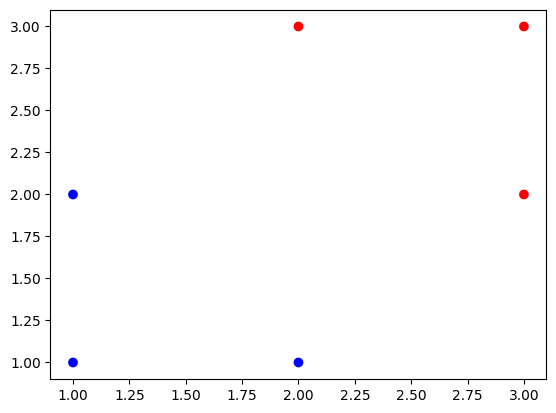

```python
# 모델 학습
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([2,1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

def hypothesis(X):
    z = tf.matmul(X, W) + b
    sigmoid = 1 / (1 + tf.exp(-z))
    return sigmoid

def cost_fn(H, Y):
    cost = -tf.reduce_mean(Y*tf.math.log(H) + (1-Y)*tf.math.log(1-H))
    return cost

learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

for step in range(5001):
    with tf.GradientTape() as g:
        pred = hypothesis(X_train)
        cost = cost_fn(pred, Y_train)

        gradients = g.gradient(cost, [W,b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if step % 1000 == 0:
        print(f'Step={step+1}, Cost = {cost}, W={W.numpy()}, b = {b.numpy()}')

w_hat = W.numpy()
b_hat = b.numpy()
```
>Step=1, Cost = 0.7932398319244385, W=[[-0.10415223] [0.68125504]], b = [0.3810195] <br>
Step=1001, Cost = 0.5122759938240051, W=[[0.1809378] [0.55177015]], b = [-0.97815347] <br>
Step=2001, Cost = 0.39883172512054443, W=[[0.5135696] [0.6884617]], b = [-1.9777462] <br>
Step=3001, Cost = 0.32507583498954773, W=[[0.7515713] [0.8368167]], b = [-2.7877953] <br>
Step=4001, Cost = 0.27400580048561096, W=[[0.9350327] [0.97824335]], b = [-3.4628296] <br>
Step=5001, Cost = 0.2367737740278244, W=[[1.0848083] [1.1075894]], b = [-4.039375]

```python
# Slope(Coefficient) 확인
slope = w_hat[0]/w_hat[1]
xx = np.linspace(np.min(X_train[:,0]),np.max(X_train[:,0])) # min과 max 사이 구간의 숫자를 생성. x값
yy = -slope*xx - b_hat/w_hat[1]                             # xx(x값)입력하여 y값 생성

# train data분포
plt.scatter(X_train[:, 0], X_train[:, 1], label='Logistics regression', color=colors)

# 분류선(Decision Boundary)확인
plt.plot(xx, yy, label='Decision Boundary')
plt.legend()
```
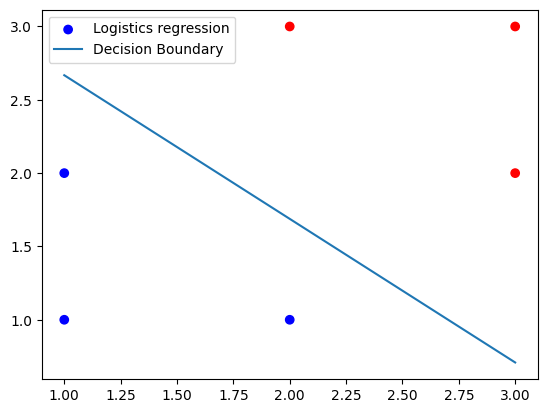

```python
# Confusion matrix
from sklearn.metrics import confusion_matrix

X_test = np.array([[1., 0.],
                   [0., 2.],
                   [1., 1.],
                   [3., 2.],
                   [3., 3.],
                   [2., 3.]],
                   dtype=np.float32)
Y_test = np.array([[0.],
                   [0.],
                   [1.],
                   [0.],
                   [1.],
                   [0.],],
                   dtype=np.float32)

Y_actual = Y_test
Y_predicted = hypothesis(X_test)
Y_predicted_binary = np.where(Y_predicted >= 0.5, 1, 0)

CM_array = confusion_matrix(Y_actual, Y_predicted_binary, labels=[0, 1]) 
CM_array
```
>array([[2, 2],<br>
       [1, 1]], dtype=int64)

```python
# Confusion matrix 시각화(seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(CM_array, annot=True, cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
```
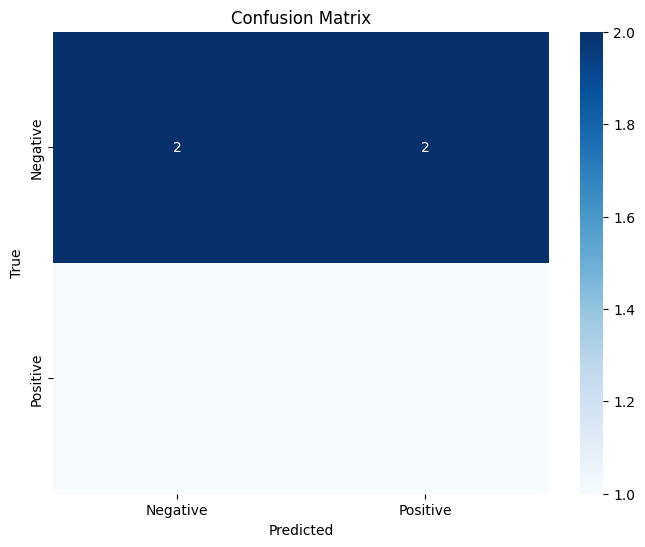

```python
# Confusion matrix 시각화(Scikit-learn)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=CM_array, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
```
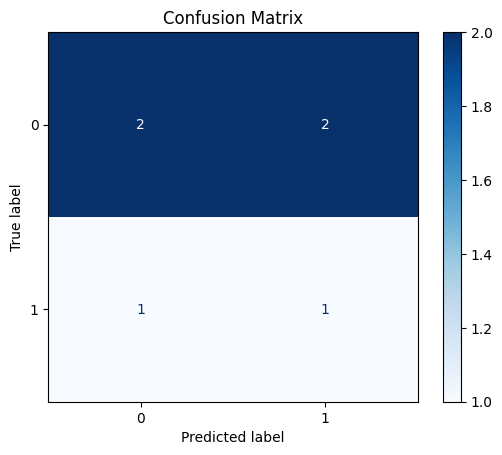

## Multi-class Classfication regression

* 2가지 분류가 아닌 3가지 이상의 분류(A,B,C로 나누는 신용등급 등)
* Binary classification과 달리 하나의 Decision boundary로는 해결 불가

* One vs All(Rest)
  * 하나의 대상과, 아닌 것'들'로 Binary Classification을 여러번 수행
  * 예를 들어 a, b, c 3가지를 분류하는 경우
    * 아래와 같은 같은 3개의 식으로 표현할 수 있고,<br>
      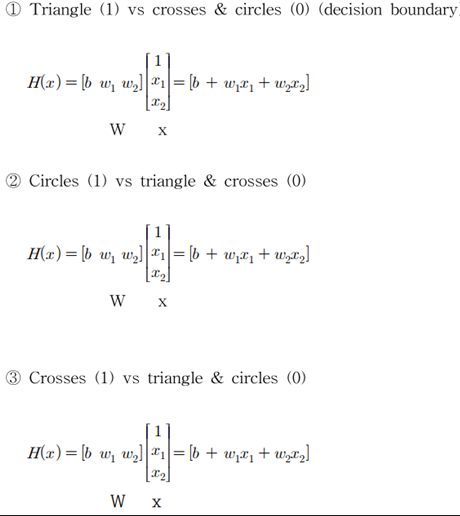
    * 아래와 같이 하나의 행렬로 한번에 표현할 수 있다 <br>
    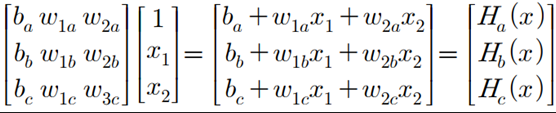
  * Softmax : 각 결과값($H_a, H_b, H_c$)의 비율(확률)이 나오게 됨(총합이 1)

* Cross entropy cost function
  * **정보량은 확률에 반비례한다고 정의** (정보량= $ 1 \over p$)
    * 특정 성씨의 사람을 뽑는다고 할 때, 한국의 주요 성씨인 김씨$1 \over 10$ vs 소수 성씨인 남궁씨$1 \over 100$
  * 로그를 취하여 전개하면 Cross entropy 식이 된다

  * Entropy : Measure for uncertainty (불확실성의 측정) <br>
    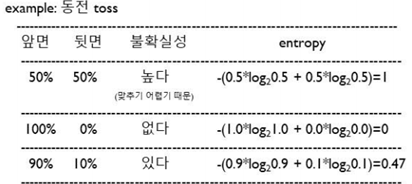
  
  * Case별 Cross entropy(cost function)
    * 출력값(결과값 softmax)과 실제값이 비슷한 경우 : 특정 값 산출
    * 출력값(결과값 softmax)과 실제값이 완전히 다른 경우 : 무한대
    * 출력값(결과값 softmax)과 실제값이 완전히 동일한 경우 : 0

  * Cross entropy를 개인이 직접구현한다면 놓칠 수 있는 부분(cross entropy의 무한대)의 문제
    * 파이토치 등 많은 사람이 참여한 패키지를 사용하면 방지할 수 있음
    * 컴퓨터에서의 Zero division error 등의 경우, 텐서플로우 등 패키지에선 분모에 0.00001등을 더하여 실제값엔 영향이 작게하며 오류 제거

# Softmax

* Multi class 분류에서 많이 하는 것 : 이미지 분류
  * Image X가 함수f(x)[모델]를 통과하여 Label Y(Class)로 산출
  * Image데이터는 컴퓨터에게는 숫자로 이루어진 행렬로 보여짐

* 아래의 경우에서 W의 차원은? ($Y=W*X+B$) → (10*3072)
  * X : Image (3072*1) (실제로는 32[가로] * 32[세로] * 3[RGB])
  * Y : 고양이/자동차/새 등 Label (10 * 1)
  * B : (10*1)

* 계산속도를 높이기 위한 방법 
  * 곱하기 한번으로 값이 나오게끔 계산횟수를 줄임<br>
  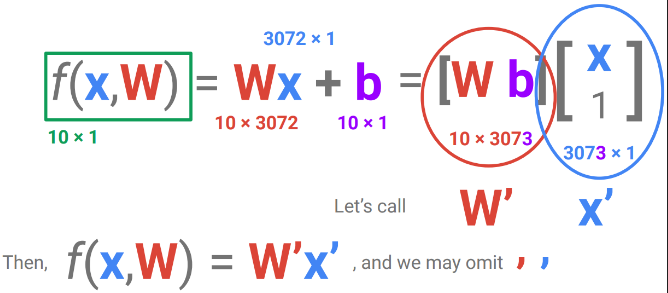
  
* Flatten
  * (2, 2)를 (4, 1)로 변경

* 학습한 W를 시각화하면, 분류하고자 하는 것의 형태가 어느정도보임(고양이 분류를 위한 W라면 고양이 실루엣)

* Softmax 함수
  * Exponetial($e$)의 사용
    * 음수가 Score로 나와서 확률적 해석에 방해되는 상황을 방지하기 위해 사용
  * Sigmoid가 Binary classification에 대한 함수인 것과 달리, Multi-class에 대해 사용 가능

# Loss function

* 0/1 Loss (가장 원시적)
  * 맞으면 0, 틀리면 1
  * 문제점 : 적게 틀린 것(고양이를 다른 동물로)과 많이 틀린 것(고양이를 자동차로)의 패널티가 같음

* Log loss
  * 틀린/맞춘 정도에 따라 패널티를 부여

* Exponetial loss
  * 틀렸을 때 더 강한 패널티(기울기)

* Hinge loss
  * SVM(Support Vector Machine)에서 많이 사용

# Cross entropy

* Binary 상황에서의 Cross entropy 수식 <br>
  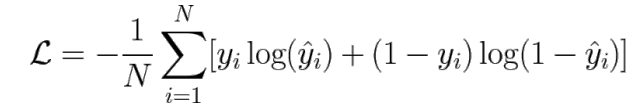
* Multi class 상황에서의 Cross entropy 수식<br>
  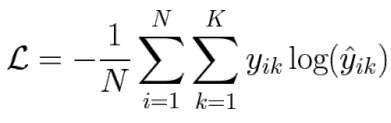

# Stochastic Gradient Descent

* Stochastic Gradient Descent : 데이터를 메모리 상황에 맞게 쪼개서 넣는 방식
  * 예를 들어, 메모리 1GB/학습할 데이터 100GB 라면 데이터를 쪼개서 넣는 것
  * 학습용 메모리 확보의 어려움 : V-Ram(그래픽카드 메모리)는 D-Ram(일반 램)보다 매우 비쌈
  * 데이터는 많으므로 확보된 메모리에 맞게 데이터를 쪼개서 GD 진행

* Batch size(Minibatch) : 나눈 데이터의 단위
  * 예를 들어 100을 1씩 나누었다면, Minibatch가 1이다 와 같이 표현함
  * Batch size는 2의 배수로 넣는 것이 관례
  * 1만개의 데이터를 100으로 나누었다면, 경사하강법(GD)을 100회 진행

* Epoch, Step
  * 100만개의 데이터를 1만개로 나눴고, 1만개를 100회 넣어 전체데이터를 1번 넣었다면?
    * 1 Epoch (모든 데이터가 다 들어가야 1 epoch)
    * 100 Step (데이터를 넣은 횟수)
    * Step횟수 > Epoch횟수 

# Neural Networks

* 이미지나 오디오, 텍스트 등 비정형데이터를 처리하기 위해 만들어진 아키텍쳐

* MLP : XOR문제를 풀 수 없는 상황에서, 사람의 신경망에서 착안하여 해결
  * 중간 신경망(hidden layer)하여, Multi Layer Perceptron(MLP)
  * 위에서 진행한 Multi classification은 1 layer라면, MLP는 layer가 더 추가된 것
  * 다양한 관계를 복합적으로 표현

* 중간에 Activation function을 넣어 비선형성을 추가
  * Sigmoid, tanh, ReLU 등 (ReLU를 많이 사용)

* Forward pass vs Back propagation
  * Forward pass : 순서대로 계산
  * Back propagation : 뒤에서부터 앞쪽으로 미분(시작값은 1)
    * Chain rule를 활용
      * Upstream gradient에 Local grandient를 곱해 Downstream gradient가 나옴
    * Forward pass대비 계산량이 적은 이점이 있다
      * Parameter $W_1$(계산량 10만), $W_2$(계산량 5만)가 있을 때,
        * Forward pass가 $W_1$의 중복계산이 발생
        * Back propagation은 Upstream의 값을 저장해두었다가 사용, 필요한 계산만 추가계산

* Patterns in Gradient Flow
  * 계산노드의 고정 : 미리 정해두면 Backpropagation미분계산을 빠르게 진행할 수 있음
    * 1.0 Tensorflow가 Flexble하지 않지만 빠른 이유는 이런 계산노드의 고정 때문
  * add gate(gradient distributor) : Upstream을 그대로 downstream으로
  * mul gate(swap multiplier) : downstream을 upstream에 곱해 반대쪽 downstream으로
  * copy gate(gradient adder)
  * max gate(gradient router)